In [1]:
#2022-10-24 15:30:02 
import os
import pandas as pd 
import numpy as np
import scipy as sp
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

from matplotlib import font_manager
# Add every font at the specified location
font_dir = ['/home/UTHSCSA/hef/Tools/miniconda3/fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'Arial'


import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages

from datetime import datetime
time = datetime.now().strftime("%Y_%m_%d")


In [2]:
## add cancer info
cancer = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/2.analysis/master_table.v5.txt')
cancer = cancer[['ID','Final Diagnosis (Laura)','Disease Code level 2', 'Disease Code level 1', 'Tumor Collected (Primary or Met)','Gender','Age(year)','Therapy prior to PDX collection']]
def add_cancer_info(data, column):
    k = []
    for ids in list(data[column]):
        if str(ids) in list(cancer['ID']):
            
            k.append(list(cancer[cancer['ID'] == str(ids)].iloc[0]))
            #print( list(cancer[cancer['ID'] == str(ids)].iloc[0]))
        else:
            #print(str(ids))
            k.append(['NA'] * 8)
    data[['PDXID','Tumor Class','Tumor group','Tumor group2', 'Primary or Met','Gender','Age(year)','Therapy prior to PDX collection'] ]= pd.DataFrame(k)
    #print(pd.DataFrame(k))
    return data

In [3]:
## add time info
cancer2 = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/2.analysis/master_table.v5.txt')
cancer2 = cancer2[['ID','Engraftment time (P0-P1)']].fillna('NA')
def add_time_info(data, column):
    k = []
    for ids in list(data[column]):
        if str(ids) in list(cancer2['ID']):
            
            k.append(list(cancer2[cancer2['ID'] == str(ids)].iloc[0]))
        else:
            k.append(['NA'] * 3)
    data[['PDXID','Engraftment time'] ]= pd.DataFrame(k)
    #print(pd.DataFrame(k))
    return data

In [4]:
a,b,c,d,e,f,g,h,i = [plt.cm.winter, plt.cm.cool, plt.cm.spring, plt.cm.copper, plt.cm.bone, plt.cm.gist_heat, plt.cm.pink, plt.cm.summer, plt.cm.autumn]

cancer_ranking_all = [ 'Osteosarcoma', 'Clear Cell Sarcoma', 'Other Sarcoma',   'Wilms Tumor', 'Hepatoblastoma','Germ Cell Tumor',   'Neuroblastoma', 'Other Tumor']
color_ranking_all = ['brg', 'Oranges', 'Reds', 'Greens_r', 'Purples_r', 'Blues_r',  'nipy_spectral', 'Greys_r']

color_ranking_palette = [ f(.6), f(.8), f(.3), h(.6), b(.6), a(.6), h(.2), e(.6)]
color_ranking_dict = {'Osteosarcoma':  f(.6),  'Clear Cell Sarcoma':f(.8), 'Other Sarcoma':f(.3),  'Wilms Tumor': h(.6), 'Hepatoblastoma':b(.6),
                     'Germ Cell Tumor': a(.6),   'Neuroblastoma':h(.2), 'Other Tumor': e(.6)}


cancer_ranking_all2 = [ 'Ovarian tumor', 'Wilms Tumor', 'Ewing Sarcoma', 'Mesothelioma', 'Clear Cell Sarcoma', 'Hepatoblastoma', 'Neuroblastoma',
                        'Germ Cell Tumor', 'Pleomorphic Sarcoma', 'Adrenal cortical carcinoma', 'Osteosarcoma', 'ERMS', 'Glioblastoma']
color_ranking_palette2 = ['darkred',h(.6), 'red', 'gold', f(.3), b(.6), h(.2),a(.6), 'firebrick', 'hotpink', f(.6), f(.7), 'darkviolet']


In [5]:
def plot_box_with_ax_datatype(dt, X, Y, ax):
    cancer_ranking1 = dt.groupby(X).median().sort_values(Y, ascending=False).index
    color_ranking1 = [color_ranking_palette[cancer_ranking_all.index(i)]  for i in cancer_ranking1 ]


    p = sns.boxplot(data = dt, x = X, y = Y,  order = cancer_ranking1,  palette=color_ranking1, ax = ax,
            fliersize=0,
                boxprops={'edgecolor': 'black', 'alpha':1,'linewidth':0, },  
                medianprops={'color':'black', 'alpha':1, 'linewidth':1.5},
                whiskerprops={'linewidth':1, 'color':'black','alpha' : 1},
           )
    plt.setp(p.collections, alpha=.7, linewidth=0)

    p = sns.stripplot(data = dt[dt['Datatype'] == 'PT'], x = X, y = Y,  ax =ax, jitter=0.1,
              color='steelblue', marker = 'o', size = 9, alpha = 0.9,  linewidth=0.5, edgecolor = '.2',
             order =cancer_ranking1)
    p = sns.stripplot(data = dt[dt['Datatype'] == 'PDX'],  x = X, y = Y,  ax = ax,jitter=0.1,
              color='orange', marker = '^', size = 9, alpha = 0.9, linewidth=0.5, edgecolor = '.2',
             order =cancer_ranking1)
    
    p.set_xticklabels(cancer_ranking1, rotation = 90)
    p.set_xlabel('')
    sns.despine()
    p.legend(bbox_to_anchor = (1,1), frameon=False)

In [6]:
group = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/2.analysis/clonality_group.txt', index_col=0)
group.index = group.index.astype(str)
group

,Group
PatientID,
54,Group1: Clone retention
498,Group1: Clone retention
560,Group1: Clone retention
655,Group1: Clone retention
668,Group1: Clone retention
1739,Group1: Clone retention
1754,Group1: Clone retention
1763,Group1: Clone retention
1792,Group1: Clone retention


#### Telo length compare (WEG and WGS)

In [7]:
col = 'LENGTH_ESTIMATE'

In [8]:
telo_len = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/z.result/Telseq.WES.txt', sep = '\t')
telo_len = telo_len[['Sample', col]]
telo_len.columns = ['Sample', 'WES_length']
telo_len['PatientID'] = telo_len['Sample'].str.split('_').str[0]
telo_len['Datatype'] = telo_len['Sample'].str.split('_').str[1]
telo_len = add_cancer_info(telo_len, 'PatientID')
telo_len = telo_len[(telo_len['PatientID']!='1853') & (telo_len['PatientID']!='512') & (telo_len['PatientID']!='707') & (telo_len['PatientID']!='1796') & (telo_len['PatientID']!='1796-Dup')]
telo_len = telo_len.replace('_WES' ,'',regex = True)
telo_len.sort_values('WES_length')

wgs = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/z.result/Telseq.WGS.txt', sep = '\t')
wgs = wgs[['Sample', col]].replace('_WGS','',regex = True).set_index('Sample')
wgs.columns = ['WGS_length']

In [9]:
dt = pd.concat([telo_len.set_index('Sample'), wgs], axis = 1)
dt = dt[dt['WES_length'].notna()]
dt

,WES_length,PatientID,Datatype,PDXID,Tumor Class,Tumor group,Tumor group2,Primary or Met,Gender,Age(year),Therapy prior to PDX collection,WGS_length
Sample,,,,,,,,,,,,
896751_PDX,1.774000,896751,PDX,896751,GCT,Germ Cell Tumor,Germ Cell Tumor,NaN,Male,NaN,NaN,8.82165
895452_PDX,0.282509,895452,PDX,895452,Ovarian,Ovarian tumor,Other Tumor,primary,Female,12.0,NaN,3.05627
892257_PDX,0.224218,892257,PDX,892257,GCT,Germ Cell Tumor,Germ Cell Tumor,primary,Female,10.0,NaN,2.96373
891760_PDX,0.345116,891760,PDX,891760,Primary,Hepatoblastoma,Hepatoblastoma,primary,Male,0.0,NaN,3.79652
891173_PDX,0.463110,891173,PDX,891173,Primary,Hepatoblastoma,Hepatoblastoma,primary,Female,1.0,NaN,2.48864
...,...,...,...,...,...,...,...,...,...,...,...,...
1753_PT,0.531065,1753,PT,1753,"nephroblastoma, nos",Wilms Tumor,Wilms Tumor,primary,Male,10.0,No treatment,5.18289
1753_PDX,0.060445,1753,PDX,1753,"nephroblastoma, nos",Wilms Tumor,Wilms Tumor,primary,Male,10.0,No treatment,2.05650
1753_Germline,0.218710,1753,Germline,1753,"nephroblastoma, nos",Wilms Tumor,Wilms Tumor,primary,Male,10.0,No treatment,4.49905


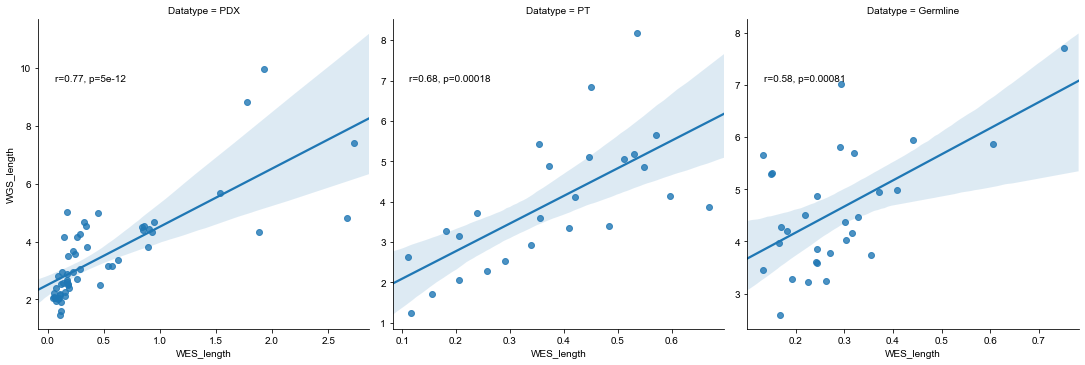

In [10]:
data =  dt[(dt['WGS_length'] > 0) & (dt['WGS_length'] < 10)].sort_values('WES_length')
X =  'WES_length'
Y = 'WGS_length'

g = sns.lmplot(data =data , x = 'WES_length', y = 'WGS_length', col  = 'Datatype',sharex=False, sharey=False, truncate=False)
def annotate(data, **kws):
    r,p = sp.stats.pearsonr(data[X], data[Y])
    ax = plt.gca()
    ax.text(.05,.8,'r={:.2f}, p={:.2g}'.format(r,p), transform = ax.transAxes)
g.map_dataframe(annotate)
g.set_axis_labels(x_var=X, y_var=Y)


#### Telomere length

In [11]:
seqtype = 'WGS'
col = 'LENGTH_ESTIMATE'

In [12]:
telo_len = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/z.result/Telseq.'+seqtype+'.txt', sep = '\t')
telo_len = telo_len[['Sample', col]]
telo_len.columns = ['Sample', 'Telomere length']
telo_len['PatientID'] = telo_len['Sample'].str.split('_').str[0]
telo_len['Datatype'] = telo_len['Sample'].str.split('_').str[1]
telo_len = add_cancer_info(telo_len, 'PatientID')
telo_len = telo_len[telo_len['Datatype']!='Germline']
telo_len = telo_len[(telo_len['PatientID']!='1853') & (telo_len['PatientID']!='512') & (telo_len['PatientID']!='707') & (telo_len['PatientID']!='1796') & (telo_len['PatientID']!='1796-Dup')]

telo_len.sort_values('Telomere length')

,Sample,Telomere length,PatientID,Datatype,PDXID,Tumor Class,Tumor group,Tumor group2,Primary or Met,Gender,Age(year),Therapy prior to PDX collection
11,655_PT_WGS,1.24577,655,PT,655,Wilms tumor,Wilms Tumor,Wilms Tumor,metastatic,Male,5.0,No treatment
62,2264_PDX_WGS,1.47161,2264,PDX,2264,"Nephroblastoma, NOS (Wilms tumor)",Wilms Tumor,Wilms Tumor,primary,Male,6.0,Chemotherapy
105,1907_PDX_WGS,1.61688,1907,PDX,1907,Pleomorphic sarcoma,Pleomorphic Sarcoma,Other Sarcoma,primary,Female,5.0,Chemotherapy
38,529_PT_WGS,1.71575,529,PT,529,"Clear cell sarcoma, NOS",Clear Cell Sarcoma,Clear Cell Sarcoma,primary,Female,13.0,radiation
6,875194_PDX_WGS,1.91185,875194,PDX,875194,NaN,Adrenal cortical carcinoma,Other Tumor,primary,Male,13.0,No treatment
...,...,...,...,...,...,...,...,...,...,...,...,...
77,1982_PDX_WGS,12.36870,1982,PDX,1982,"Epithel. mesothelioma, mal.",Mesothelioma,Other Tumor,primary,Male,16.0,No treatment
118,1795_PT_WGS,12.68980,1795,PT,1795,Mixed germ cell tumor,Germ Cell Tumor,Germ Cell Tumor,primary,Male,17.0,No treatment
99,1913_PT_WGS,13.57260,1913,PT,1913,"Neuroblastoma, NOS",Neuroblastoma,Neuroblastoma,primary,Male,5.0,No treatment
78,1981_PDX_WGS,15.26880,1981,PDX,1981,"Osteosarcoma, NOS",Osteosarcoma,Osteosarcoma,primary,Male,12.0,Chemotherapy


No handles with labels found to put in legend.
No handles with labels found to put in legend.


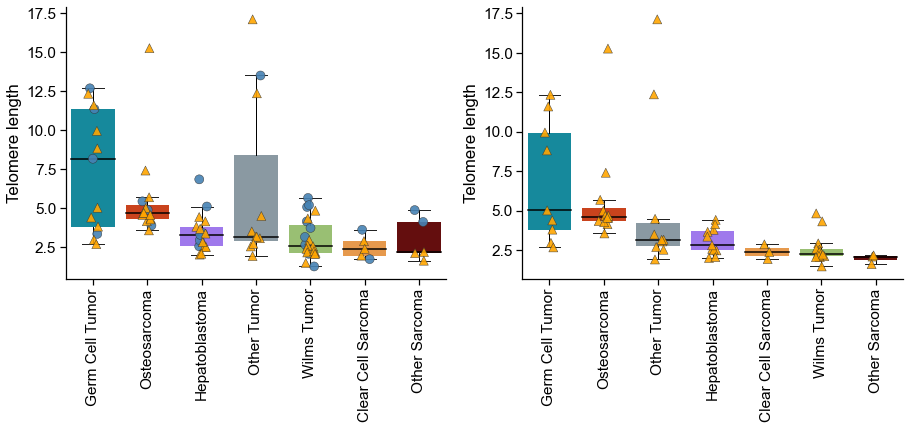

In [13]:
telo_len = telo_len.replace('Neuroblastoma', 'Other Tumor')

sns.set_context('notebook',font_scale = 1.4, rc = {'lines.linewidth':1}) #设置文本
fig = plt.figure(figsize=(15,5))

gs = gridspec.GridSpec(1, 2, hspace=0.5 , width_ratios=[1,1]) #不同图片间隔
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

X = 'Tumor group2'
Y = 'Telomere length'
g = plot_box_with_ax_datatype(telo_len, X, Y, ax1)
g2 = plot_box_with_ax_datatype(telo_len[telo_len['Datatype'] == 'PDX'], X, Y, ax2)



#### TL diff or ratio

In [14]:
tool = 'Telseq'
seqtype = 'WES'
col = 'LENGTH_ESTIMATE'

In [15]:
telo_len = pd.read_table('/home/UTHSCSA/hef/2.Project/5.PDX/z.result/Telseq.'+seqtype+'.txt', sep = '\t')
telo_len = telo_len[['Sample', col]]
telo_len.columns = ['Sample', 'Telomere length']
telo_len['PatientID'] = telo_len['Sample'].str.split('_').str[0]
telo_len['Datatype'] = telo_len['Sample'].str.split('_').str[1]
telo_len = add_cancer_info(telo_len, 'PatientID')
telo_len = telo_len[(telo_len['PatientID']!='1853') & (telo_len['PatientID']!='512') & (telo_len['PatientID']!='707') & (telo_len['PatientID']!='1796') & (telo_len['PatientID']!='1796-Dup')]


telo_len = telo_len.set_index(['PatientID', 'Datatype'])[['Telomere length']].unstack('Datatype')
telo_len.columns = ['G', 'PDX', 'PT']
telo_len['PDX_TL_ratio'] = np.log2(telo_len['PDX']/telo_len['G'])
telo_len['PT_TL_ratio'] = np.log2(telo_len['PT']/telo_len['G'])
telo_len['Diff']  = (telo_len['PDX'] - telo_len['PT'])
telo_len['Diff_TL']  = telo_len['PDX_TL_ratio'] - telo_len['PT_TL_ratio']

m = pd.concat([telo_len, group], axis = 1).sort_values('Diff')
m = m[m['Diff'].notna()]
m

,G,PDX,PT,PDX_TL_ratio,PT_TL_ratio,Diff,Diff_TL,Group
PatientID,,,,,,,,
1795,0.243129,0.171262,1.528060,-0.505517,2.651907,-1.356798,-3.157424,Group1: Clone retention
1826,0.293214,0.388261,1.310750,0.405073,2.160367,-0.922489,-1.755294,Group1: Clone retention
1763,NaN,0.052510,0.570423,NaN,NaN,-0.517913,NaN,Group1: Clone retention
54,NaN,0.055473,0.547837,NaN,NaN,-0.492364,NaN,Group1: Clone retention
560,0.605385,0.123750,0.596702,-2.290424,-0.020842,-0.472952,-2.269582,Group1: Clone retention
1753,0.218710,0.060445,0.531065,-1.855317,1.279869,-0.470620,-3.135186,Group2: Clone sweeping
1739,NaN,0.048933,0.445794,NaN,NaN,-0.396861,NaN,Group1: Clone retention
1792,0.261466,0.337296,0.669242,0.367392,1.355905,-0.331946,-0.988513,Group1: Clone retention
1907,NaN,0.114767,0.419991,NaN,NaN,-0.305224,NaN,Group1: Clone retention


##### Diff

In [16]:
m1 = m.replace('Group1: Clone retention', 'Group1').replace('Group2: Clone sweeping', 'Group23').replace('Group3: Branch seeding','Group23')#.replace('ungrouped','Group23')

m1 = m1.sort_values(['Group','Diff'])


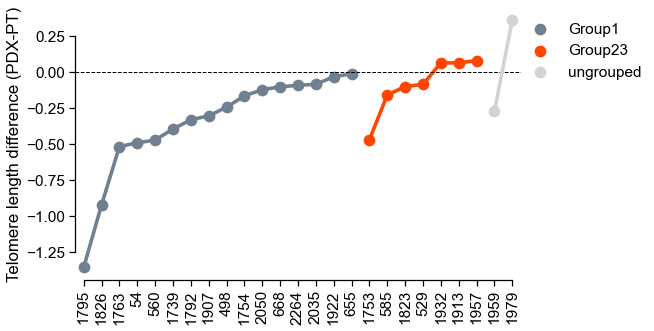

In [17]:
sns.set_context('notebook',font_scale = 1.4, rc = {'lines.linewidth':1}) #设置文本
fig = plt.figure(figsize=(8,5))

g = sns.pointplot(data = m1, x=m1.reset_index().index, y = 'Diff', 
            hue = 'Group', hue_order = ['Group1', 'Group23', 'ungrouped'], #hue_order = ['Group1: Clone retention', 'Group2: clone sweeping', 'Group3: progenitor seeding', 'ungrouped'], #
            palette = ['slategray','orangered','lightgray'],
            dodge = False, alpha = 0.9, scale = 2,
           )
plt.ylabel('Telomere length difference (PDX-PT)')
plt.xticks(ticks = list(range(len(m1))), labels = m1.index, rotation = 90)

plt.axhline(y = 0, linewidth = 1, color = 'black', linestyle = '--')
mean =  round(m1.Diff.mean(), 2)

sns.despine(trim = True)
plt.legend(bbox_to_anchor = (1.3,1), loc = 1, frameon = False)


##### TL ratio

In [18]:
df = telo_len[['PDX_TL_ratio','PT_TL_ratio']].reset_index().melt(id_vars='PatientID', var_name='Type', value_name='log2(TL ratio)').dropna().reset_index()
df = add_cancer_info(df, 'PatientID')
df['Datatype'] = df['Type'].str.split('_').str[0]
df = df.replace('Yes (unspecified)', 'With treatment').replace('Chemotherapy', 'With treatment').replace('radiation', 'With treatment')
df

,index,PatientID,Type,log2(TL ratio),PDXID,Tumor Class,Tumor group,Tumor group2,Primary or Met,Gender,Age(year),Therapy prior to PDX collection,Datatype
0,1,1753,PDX_TL_ratio,-1.855317,1753,"nephroblastoma, nos",Wilms Tumor,Wilms Tumor,primary,Male,10.0,No treatment,PDX
1,2,1754,PDX_TL_ratio,0.193848,1754,"Clear cell sarcoma, NOS",Clear Cell Sarcoma,Clear Cell Sarcoma,primary,Male,1.0,No treatment,PDX
2,4,1792,PDX_TL_ratio,0.367392,1792,Metastatic Osteosarcoma,Osteosarcoma,Osteosarcoma,primary,Female,17.0,With treatment,PDX
3,5,1795,PDX_TL_ratio,-0.505517,1795,Mixed germ cell tumor,Germ Cell Tumor,Germ Cell Tumor,primary,Male,17.0,No treatment,PDX
4,6,1823,PDX_TL_ratio,-0.329083,1823,"Nephroblastoma, NOS (Wilms tumor)",Wilms Tumor,Wilms Tumor,primary,Female,5.0,No treatment,PDX
5,7,1826,PDX_TL_ratio,0.405073,1826,Mixed germ cell tumor,Germ Cell Tumor,Germ Cell Tumor,primary,Male,14.0,No treatment,PDX
6,9,1912,PDX_TL_ratio,-1.204209,1912,"Nephroblastoma, NOS",Wilms Tumor,Wilms Tumor,primary,Female,3.0,No treatment,PDX
7,10,1913,PDX_TL_ratio,2.996063,1913,"Neuroblastoma, NOS",Neuroblastoma,Neuroblastoma,primary,Male,5.0,No treatment,PDX
8,12,1922,PDX_TL_ratio,0.140413,1922,"Osteosarcoma, NOS",Osteosarcoma,Osteosarcoma,primary,Male,7.0,No treatment,PDX
9,13,1925,PDX_TL_ratio,-2.093849,1925,Hepatoblastoma,Hepatoblastoma,Hepatoblastoma,primary,Female,3.0,With treatment,PDX


No handles with labels found to put in legend.
No handles with labels found to put in legend.


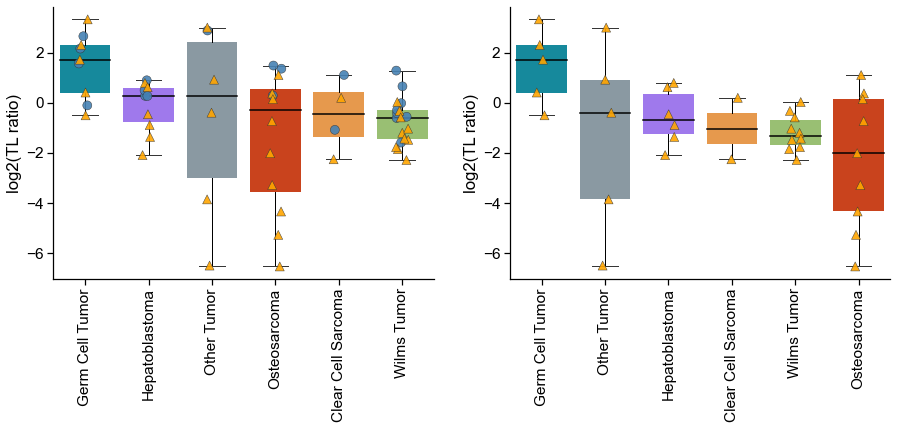

In [19]:
df = df.replace('Neuroblastoma', 'Other Tumor')


sns.set_context('notebook',font_scale = 1.4, rc = {'lines.linewidth':1}) #设置文本
fig = plt.figure(figsize=(15,5))

gs = gridspec.GridSpec(1, 2, hspace=0.5 , width_ratios=[1,1]) #不同图片间隔
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

X = 'Tumor group2'
Y = 'log2(TL ratio)'
g = plot_box_with_ax_datatype(df, X, Y, ax1)
g2 = plot_box_with_ax_datatype(df[df['Datatype'] == 'PDX'], X, Y, ax2)


In [20]:
telo_len = pd.concat([telo_len, group], axis =1)
telo_len['Diff'] = telo_len['PT_TL_ratio'] - telo_len['PDX_TL_ratio']
telo_len = telo_len.dropna().sort_values('Diff')


dt_input2 = telo_len.filter(regex = 'ratio').reset_index().melt(id_vars=['PatientID'], value_name='TL ratio', var_name='Type')
dt_input2['Datatype'] = dt_input2['Type'].str.split('_').str[0]
dt_input2 = add_cancer_info(dt_input2, 'PatientID')
dt_input2

,PatientID,Type,TL ratio,Datatype,PDXID,Tumor Class,Tumor group,Tumor group2,Primary or Met,Gender,Age(year),Therapy prior to PDX collection
0,1979,PDX_TL_ratio,2.302002,PDX,1979,Mixed germ cell tumor,Germ Cell Tumor,Germ Cell Tumor,primary,Male,15.0,Chemotherapy
1,1932,PDX_TL_ratio,0.025668,PDX,1932,"Nephroblastoma, NOS (Wilms tumor)",Wilms Tumor,Wilms Tumor,primary,Male,4.0,No treatment
2,1957,PDX_TL_ratio,0.787658,PDX,1957,Hepatoblastoma,Hepatoblastoma,Hepatoblastoma,primary,Male,1.0,Chemotherapy
3,1913,PDX_TL_ratio,2.996063,PDX,1913,"Neuroblastoma, NOS",Neuroblastoma,Neuroblastoma,primary,Male,5.0,No treatment
4,1922,PDX_TL_ratio,0.140413,PDX,1922,"Osteosarcoma, NOS",Osteosarcoma,Osteosarcoma,primary,Male,7.0,No treatment
5,655,PDX_TL_ratio,-1.774948,PDX,655,Wilms tumor,Wilms Tumor,Wilms Tumor,metastatic,Male,5.0,No treatment
6,2035,PDX_TL_ratio,1.101655,PDX,2035,"Osteosarcoma, NOS",Osteosarcoma,Osteosarcoma,primary,Male,12.0,Chemotherapy
7,668,PDX_TL_ratio,-1.037473,PDX,668,Wilms tumor,Wilms Tumor,Wilms Tumor,primary,Male,4.0,No treatment
8,2264,PDX_TL_ratio,-1.436289,PDX,2264,"Nephroblastoma, NOS (Wilms tumor)",Wilms Tumor,Wilms Tumor,primary,Male,6.0,Chemotherapy
9,1754,PDX_TL_ratio,0.193848,PDX,1754,"Clear cell sarcoma, NOS",Clear Cell Sarcoma,Clear Cell Sarcoma,primary,Male,1.0,No treatment


In [21]:
ranking = dt_input2.PatientID.unique()
cancer_ranking = [dt_input2[dt_input2['PatientID'] == i]['Tumor group2'].iloc[0] for i in ranking]
color_ranking = [color_ranking_palette[cancer_ranking_all.index(i)]  for i in cancer_ranking ]

PDX v.s. PT: t-test paired samples, P_val=5.939e-04 stat=-4.072e+00


Text(40.875, 0.5, 'log$_{2}$(TL ratio)')

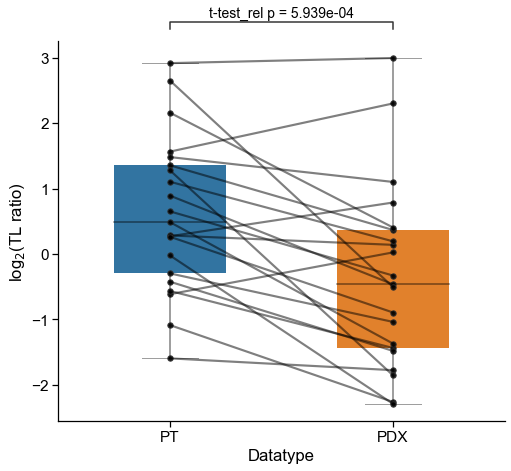

In [22]:
sns.set_context('notebook', font_scale = 1.4, rc = {'lines.linewidth':1}) #设置文本
fig = plt.figure(figsize=(8,7))


p = sns.boxplot(data = dt_input2, x ='Datatype', y = 'TL ratio', order = reversed(list(dt_input2.Datatype.unique())),
                boxprops={'edgecolor': 'black', 'alpha':1,'linewidth':0, },  # 'facecolor':'None'
                medianprops={'color':'black', 'alpha':1, 'linewidth':1.5,},
                whiskerprops={'linewidth':1.5, 'color':'black','alpha' : 1},
                showfliers=False, width=0.5, 
           )
g = sns.pointplot(data = dt_input2, x ='Datatype', y = 'TL ratio', order = reversed(list(dt_input2.Datatype.unique())),
                  hue = 'PatientID',  hue_order=ranking, palette=['black']*len(ranking),  #palette=color_ranking, #
               scale=1.2, alpha = 0.5,
             )
plt.setp(g.collections, alpha=0.9, edgecolor = '.2', linewidth=1) #for the markers
plt.setp(g.lines, alpha=.5)       #for the lines

from statannot import add_stat_annotation
add_stat_annotation(p, data = dt_input2.fillna(0), x = 'Datatype', y = 'TL ratio',   #order =  ['PT','PDX'],
                    box_pairs=[tuple(reversed(list(dt_input2.Datatype.unique())),) ],
                    test='t-test_paired', text_format='full', loc='outside', verbose=2,  comparisons_correction=None,
                    fontsize='small')

p.get_legend().remove()
sns.despine()
p.set_ylabel('log$_{2}$(TL ratio)')
